# Changing date format

In [14]:
import pandas as pd


df = pd.read_csv('Case_Study_Customer_Data.csv')


df['Customer Created Date'] = pd.to_datetime(df['Customer Created Date'], format='%d %b, %Y %H:%M:%S')


df['Customer Created Date'] = df['Customer Created Date'].dt.date


df.to_csv('Customer_Data.csv', index=False)



In [15]:
import pandas as pd


df = pd.read_csv('Case_Study_Orders_Data.csv')


df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%y %H:%M')


df['Order Date'] = df['Order Date'].dt.date


df.to_csv('Orders_Data.csv', index=False)



 1.	Prepare analysis on the Orders Data and Customer Data while touching upon monthly revenues, users, monthly revenue per user etc

In [16]:
import pandas as pd
import numpy as np


In [17]:
customer_data = pd.read_csv('Customer_Data.csv')
orders_data = pd.read_csv('Orders_Data.csv')


In [18]:
customer_data['Customer Created Date'] = pd.to_datetime(customer_data['Customer Created Date'])
orders_data['Order Date'] = pd.to_datetime(orders_data['Order Date'])


In [19]:
start_date = pd.Timestamp('2021-01-01')
end_date = pd.Timestamp('2021-06-30')
filtered_customer_data = customer_data[(customer_data['Customer Created Date'] >= start_date) & (customer_data['Customer Created Date'] <= end_date)]
filtered_orders_data = orders_data[(orders_data['Order Date'] >= start_date) & (orders_data['Order Date'] <= end_date)]


In [20]:
monthly_revenues = filtered_orders_data[filtered_orders_data['Order Status'] == 'Won'].groupby(filtered_orders_data['Order Date'].dt.to_period('M'))['Order Amount'].sum()


In [21]:
monthly_users = filtered_customer_data.groupby(filtered_customer_data['Customer Created Date'].dt.to_period('M')).size()


In [22]:
monthly_revenue_per_user = monthly_revenues / monthly_users


In [23]:
analysis_data = pd.DataFrame({
    'Month': monthly_revenues.index.strftime('%Y-%m'),
    'Monthly Revenue (INR)': monthly_revenues.values,
    'Monthly Users': monthly_users.values,
    'Monthly Revenue per User (INR)': monthly_revenue_per_user.values
})


In [24]:
analysis_data.to_csv('Analysis_Results.csv', index=False)


2.	Prepare an analysis showing how many users placed a Purchase order, while how many actually converted bifurcated by

1.	Month
2.	Customer Profession


In [27]:
import pandas as pd

# Read the Customer Data and Orders Data CSV files
customer_data = pd.read_csv('Customer_Data.csv')
orders_data = pd.read_csv('Orders_Data.csv')

# Convert the date columns to proper datetime format
customer_data['Customer Created Date'] = pd.to_datetime(customer_data['Customer Created Date'])
orders_data['Order Date'] = pd.to_datetime(orders_data['Order Date'])

# Filter the data for the specified period (1-Jan-2021 to 10-Sep-2021)
start_date = pd.Timestamp('2021-01-01')
end_date = pd.Timestamp('2021-09-10')
filtered_customer_data = customer_data[(customer_data['Customer Created Date'] >= start_date) & (customer_data['Customer Created Date'] <= end_date)]
filtered_orders_data = orders_data[(orders_data['Order Date'] >= start_date) & (orders_data['Order Date'] <= end_date)]

# Count the number of users who placed a purchase order per month
order_users = filtered_orders_data.groupby(filtered_orders_data['Order Date'].dt.to_period('M'))['Cust ID'].nunique().reset_index()
order_users = order_users.rename(columns={'Cust ID': 'Order Users'})

# Count the number of converted users per month and customer profession
converted_users = filtered_orders_data[filtered_orders_data['Order Status'] == 'Won'].groupby(filtered_orders_data['Order Date'].dt.to_period('M'))['Cust ID'].nunique().reset_index()
converted_users = converted_users.rename(columns={'Cust ID': 'Converted Users'})

# Merge the order_users and converted_users DataFrames
analysis_data = pd.merge(order_users, converted_users, on='Order Date', how='left').fillna(0)

# Save the analysis results to a new CSV file
analysis_data.to_csv('Conversion_Analysis.csv', index=False)


3.	Prepare a COHORT analysis showing the purchase pattern of users by month

Cohort Analysis: Cohort analysis is a type of analysis where we understand the behavior of customers by groups over a period of time. Eg. How are the customers who joined in the month of Jan 2021 are performing in the coming months in terms of # of orders placed, # of purchases made etc


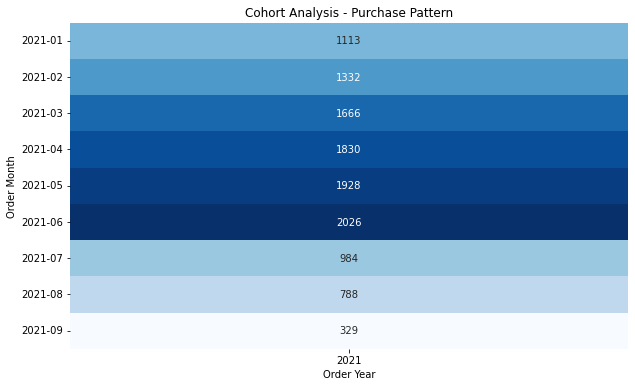

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

orders_data = pd.read_csv('Orders_Data.csv')

orders_data['Order Date'] = pd.to_datetime(orders_data['Order Date'])

orders_data['Order Date'] = pd.to_datetime(orders_data['Order Date'])

orders_data['Order Month'] = orders_data['Order Date'].dt.to_period('M')
orders_data['Order Year'] = orders_data['Order Date'].dt.year

cohort_data = orders_data.groupby(['Cust ID', 'Order Year', 'Order Month']).agg({'Order No': pd.Series.nunique}).reset_index()
cohort_data = cohort_data.rename(columns={'Order No': 'Number of Orders'})

cohort_table = cohort_data.pivot_table(index='Order Month', columns='Order Year', values='Number of Orders', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(cohort_table, cmap='Blues', annot=True, fmt='.0f', cbar=False)
plt.title('Cohort Analysis - Purchase Pattern')
plt.xlabel('Order Year')
plt.ylabel('Order Month')
plt.show()
